# 03 Example - Repeat Scans

In [13]:
import pyscan as ps
import matplotlib.pyplot as plt
import numpy as np
import random

## Define a Measure Function

In [40]:
def generate_multiD_data(expt):
    """
    Generates fake data:
    x0 - 0D data (point)
    x1 - 1D data (line)
    x2 - 2D data (grid)
    """
     
    runinfo = expt.runinfo
    devices = expt.devices

    d = ps.ItemAttribute()

    v = runinfo.loop1.i + random.gauss(mu=0.0, sigma=0.5)

    d.x0 = v # point
    d.x1 = [v for i in range(5)] # line
    d.x2 = [[v for i in range(5)] for j in range(5)] # grid
    
    return d

## Setup devices as members of an ItemAttribute instance

In [5]:
devices = ps.ItemAttribute()

devices.v1 = ps.TestVoltage() # Device 1
devices.v2 = ps.TestVoltage() # Device 2
devices.v3 = ps.TestVoltage() # Device 3


## 1D Scan with loop0 as Repeat Scan, using point data

In [41]:
# Set up the runinfo with loop0 as RepeatScan
runinfo = ps.RunInfo()
runinfo.loop0 = ps.RepeatScan(20, dt=0.01)

runinfo.measure_function = generate_multiD_data

expt = ps.Sweep(runinfo, devices)
expt.start_thread()

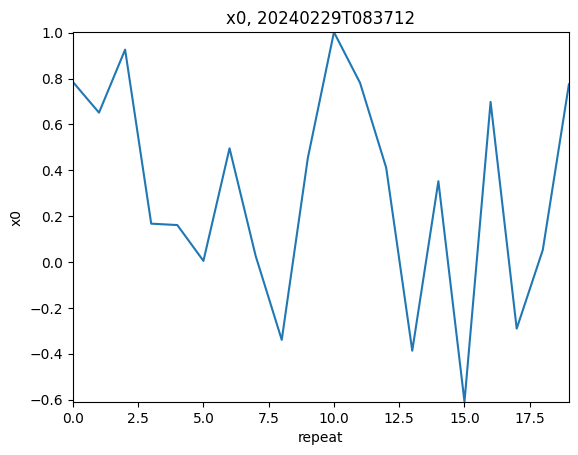

In [42]:
# 1D Plot using point data
ps.live_plot1D(expt, data_name="x0")

## 2D Scan with loop1 as Repeat Scan, using point data

In [43]:
# Set up the runinfo with loop0 as PropertyScan and loop1 as RepeatScan
runinfo = ps.RunInfo()
runinfo.loop0 = ps.PropertyScan({'v1': ps.drange(0, 0.1, 1)}, prop='voltage', dt=0.01)
runinfo.loop1 = ps.RepeatScan(10, dt=0.01)

runinfo.measure_function = generate_multiD_data

expt = ps.Sweep(runinfo, devices)
expt.start_thread()


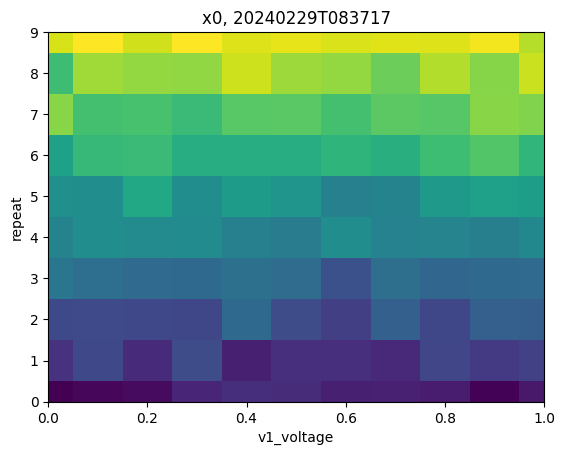

In [44]:
# 2D Plot using point data
ps.live_plot2D(expt, data_name="x0")

## 2D Scan with loop0 as Repeat Scan, using point Data

In [45]:
# Set up the runinfo with loop0 as RepeatScan and loop1 as PropertyScan
runinfo = ps.RunInfo()
runinfo.loop0 = ps.RepeatScan(10, dt=0.01)
runinfo.loop1 = ps.PropertyScan({'v1': ps.drange(0, 0.1, 1)}, prop='voltage', dt=0.01)

runinfo.measure_function = generate_multiD_data

expt = ps.Sweep(runinfo, devices)
expt.start_thread()

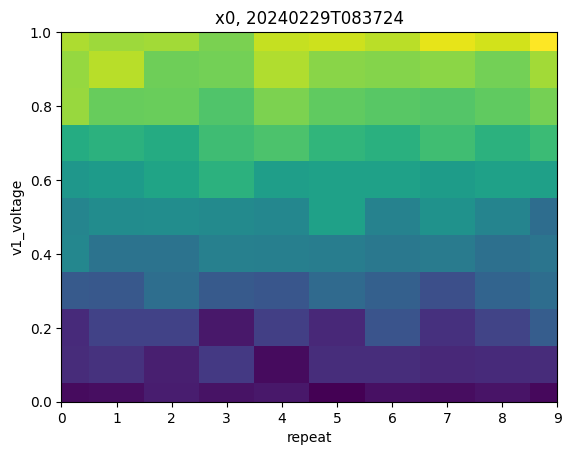

In [46]:
# 2D Plot using point data
try:
    ps.live_plot2D(expt, data_name="x0")
except KeyboardInterrupt:
    expt.stop()